In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [2]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [3]:
import numpy as np

# Detect outliers using the IQR method
for col in ['Mileage', 'Horse Power', 'Age', 'Price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Data Shape After Outlier Removal:", data.shape)

Data Shape After Outlier Removal: (4285, 13)


In [4]:
X.shape, y.shape

((5128, 11), (5128,))

In [5]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [6]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [7]:
X_encoded = ct.fit_transform(X)

In [8]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4102, 805), (1026, 805), (4102,), (1026,))

----------------------------------MODEL--------------------------------------------

In [11]:
final_dataset=pd.get_dummies(data,drop_first=True)


In [12]:
final_dataset.head()


,Price,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
3,69000.0,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,29000.0,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,42000.0,7.0,2396.0,2023,1,17.529215,6000.000000,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,61999.0,5.0,25000.0,2023,2,2.479960,12399.800000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,12000.0,7.0,14000.0,2023,2,0.857143,1714.285714,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
final_dataset.corr()


,Price,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
Price,1.000000,0.449912,-0.458396,0.348298,-0.564493,0.206470,0.849153,-0.022845,0.155600,-0.002087,...,-0.190074,0.091844,-0.055946,-0.002158,0.146463,0.093403,0.001764,-0.001896,0.079296,-0.099122
Horse Power,0.449912,1.000000,0.097483,0.168172,0.046984,0.027891,-0.042186,0.026955,0.155349,0.019937,...,-0.166969,0.064070,-0.008665,0.016276,0.006441,-0.075078,0.038239,-0.018912,0.026264,0.003616
Mileage,-0.458396,0.097483,1.000000,-0.200709,0.701845,-0.256502,-0.585642,0.016770,0.027559,-0.022976,...,0.060847,-0.082451,0.008540,-0.027070,-0.197413,-0.075974,0.003736,-0.023856,-0.073611,0.029506
Posting Year,0.348298,0.168172,-0.200709,1.000000,-0.214453,0.099414,0.292437,0.021981,0.025686,0.046023,...,-0.048745,0.032504,-0.000574,0.015317,0.031471,0.036137,0.021667,0.026565,0.083523,-0.012935
Age,-0.564493,0.046984,0.701845,-0.214453,1.000000,-0.206310,-0.685436,0.036085,0.015271,-0.019487,...,0.085323,-0.090666,-0.062840,-0.017823,-0.223987,-0.115505,0.011328,-0.011248,-0.039488,0.036617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_of_origin_Spain,0.093403,-0.075078,-0.075974,0.036137,-0.115505,0.005968,0.174687,-0.012885,-0.034557,-0.005111,...,-0.049672,-0.057044,-0.026290,-0.004172,-0.068818,1.000000,-0.005902,-0.002950,-0.024334,-0.051052
country_of_origin_Sweden,0.001764,0.038239,0.003736,0.021667,0.011328,-0.003034,-0.016314,-0.002040,-0.005471,-0.000809,...,-0.007864,-0.009031,-0.004162,-0.000661,-0.010895,-0.005902,1.000000,-0.000467,-0.003852,-0.008082
country_of_origin_Tunisia,-0.001896,-0.018912,-0.023856,0.026565,-0.011248,0.003509,0.012771,-0.001020,-0.002734,-0.000404,...,-0.003931,-0.004514,-0.002080,-0.000330,-0.005446,-0.002950,-0.000467,1.000000,-0.001926,-0.004040
country_of_origin_United Kingdom,0.079296,0.026264,-0.073611,0.083523,-0.039488,0.041144,0.083131,-0.008411,-0.022557,-0.003336,...,-0.032424,-0.037236,-0.017161,-0.002723,-0.044921,-0.024334,-0.003852,-0.001926,1.000000,-0.033324


In [14]:
y=final_dataset['Price']
y.head()

3    69000.0
4    29000.0
5    42000.0
6    61999.0
7    12000.0
Name: Price, dtype: float64

In [15]:
X=final_dataset.drop(['Price'],axis=1)
X.head()

,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,Manufacturer_BMW,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
3,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,7.0,2396.0,2023,1,17.529215,6000.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,5.0,25000.0,2023,2,2.479960,12399.800000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,7.0,14000.0,2023,2,0.857143,1714.285714,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Finding out the labels that has a much greater impact on the model.

In [16]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
print(model.feature_importances_)

[1.49746496e-01 1.39651095e-02 2.54530719e-03 5.37587059e-02
 2.43167646e-02 5.13223040e-01 3.06953723e-06 1.29400727e-04
 4.34207542e-06 2.95762217e-04 2.06014987e-07 8.29533116e-05
 1.20403702e-05 1.73493823e-08 3.40089756e-04 2.76535048e-06
 3.11013634e-06 2.04321402e-05 2.13498031e-06 6.05031733e-05
 3.61191540e-05 5.63682280e-06 8.55514363e-06 9.19920647e-08
 5.31335135e-05 1.25842887e-05 8.38252126e-05 7.80119711e-06
 2.88439582e-05 5.51241023e-04 2.46892621e-08 1.42118708e-08
 1.90907052e-04 3.05859007e-06 8.88982494e-05 2.53517053e-04
 8.22722645e-06 3.12703528e-05 9.01399058e-05 6.87476947e-05
 1.14730610e-04 1.60658515e-07 3.36374046e-05 3.15072517e-04
 4.12480125e-05 2.63371567e-04 5.28556635e-05 1.68261893e-07
 5.09660963e-05 3.34886182e-04 1.37358856e-06 0.00000000e+00
 9.15015641e-09 8.13204424e-08 3.24882685e-07 1.70410263e-07
 7.95085680e-09 2.22420206e-07 1.92465433e-07 2.26641679e-06
 3.12294527e-06 9.66037785e-06 1.75822816e-08 6.32797161e-08
 6.15289924e-06 1.665675

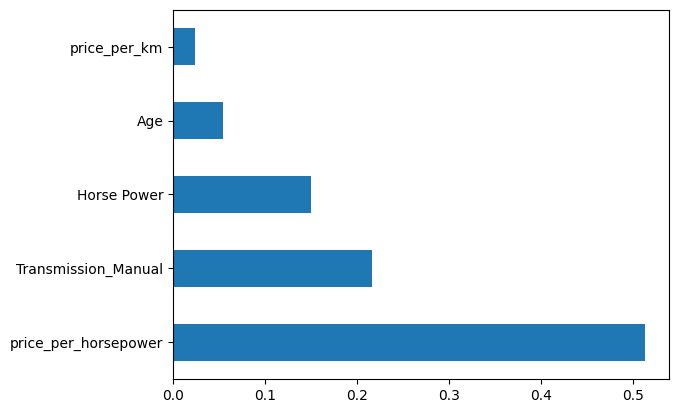

In [18]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
#scaler=StandardScaler()
#X=scaler.fit_transform(X)

In [20]:
X

,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,Manufacturer_BMW,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
3,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,7.0,2396.0,2023,1,17.529215,6000.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,5.0,25000.0,2023,2,2.479960,12399.800000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,7.0,14000.0,2023,2,0.857143,1714.285714,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,9.0,158000.0,2024,15,0.392405,6888.888889,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5111,8.0,113000.0,2024,10,0.867257,12250.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5125,7.0,93000.0,2024,10,0.838710,11142.857143,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5126,6.0,184600.0,2024,9,0.368364,11333.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [22]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
train_acc=random_forest_regressor.score(X_train,y_train)
test_acc=random_forest_regressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  99.97 %
Testing Accuracy:  99.78 %


In [24]:
predictions=random_forest_regressor.predict(X_test)
predictions

array([16731.45, 23494.  , 24941.  , ..., 64995.  , 65761.6 , 20968.5 ])

In [49]:
predictions=random_forest_regressor.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, predictions)
mse_new = mean_squared_error(y_test, predictions)
r2_new = r2_score(y_test, predictions)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 116.77637212404133
MSE après suppression: 107887.23934944982
R² après suppression: 0.9997465004480456


In [31]:
feature_importance = random_forest_regressor.feature_importances_
features = X_train.columns

In [33]:
original_features = set(col.split('_')[0] for col in features)
original_features


{'Age',
 'Fuel',
 'Horse Power',
 'Manufacturer',
 'Mileage',
 'Model',
 'Posting Month',
 'Posting Year',
 'Transmission',
 'country',
 'price'}

In [34]:
# Fit the Random Forest model (if not already done)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance)


                  Feature  Importance
5    price_per_horsepower    0.628350
0             Horse Power    0.219836
4            price_per_km    0.140494
1                 Mileage    0.009788
3                     Age    0.000307
..                    ...         ...
65    Model_2008 PURETECH    0.000000
58              Model_190    0.000000
540       Model_X3 S LINE    0.000000
531           Model_VERSO    0.000000
534         Model_VOYAGER    0.000000

[580 rows x 2 columns]


In [44]:
X_train.columns                           

Index(['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km',
       'price_per_horsepower', 'Manufacturer_ALFA ROMEO', 'Manufacturer_AUDI',
       'Manufacturer_BAIC', 'Manufacturer_BMW',
       ...
       'country_of_origin_Italy', 'country_of_origin_Japan',
       'country_of_origin_Romania', 'country_of_origin_Russia',
       'country_of_origin_South Korea', 'country_of_origin_Spain',
       'country_of_origin_Sweden', 'country_of_origin_Tunisia',
       'country_of_origin_United Kingdom', 'country_of_origin_United States'],
      dtype='object', length=580)

In [35]:
# Random Forest model (replace rf_model with your model)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort and get top 3 features
top_3_features = feature_importance.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)


                Feature  Importance
5  price_per_horsepower    0.628350
0           Horse Power    0.219836
4          price_per_km    0.140494


In [37]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort and get top 3 features
top_3_features = perm_importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)


                Feature  Importance
5  price_per_horsepower    1.326504
0           Horse Power    0.483392
4          price_per_km    0.103996


C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_1480\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Price', ylabel='Density'>

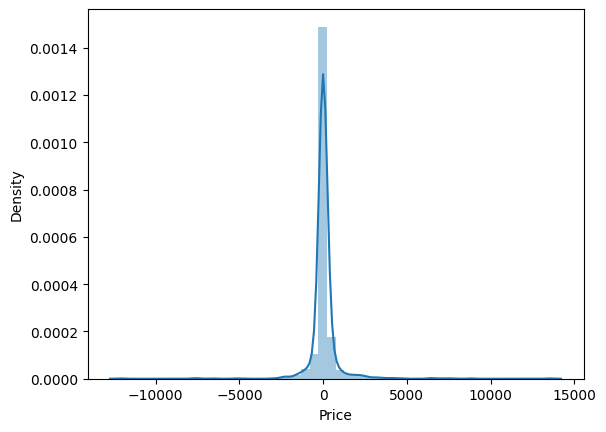

In [27]:
sns.distplot(y_test-predictions)

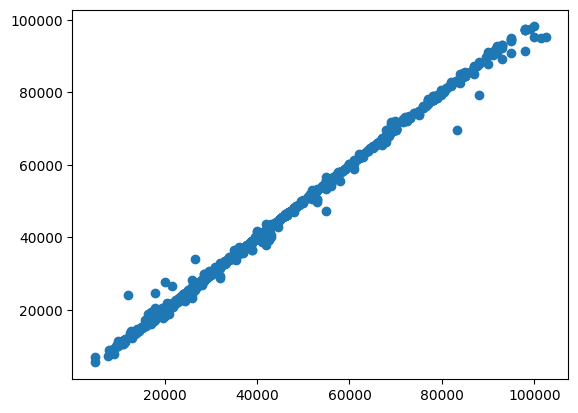

In [28]:
plt.scatter(y_test,predictions)

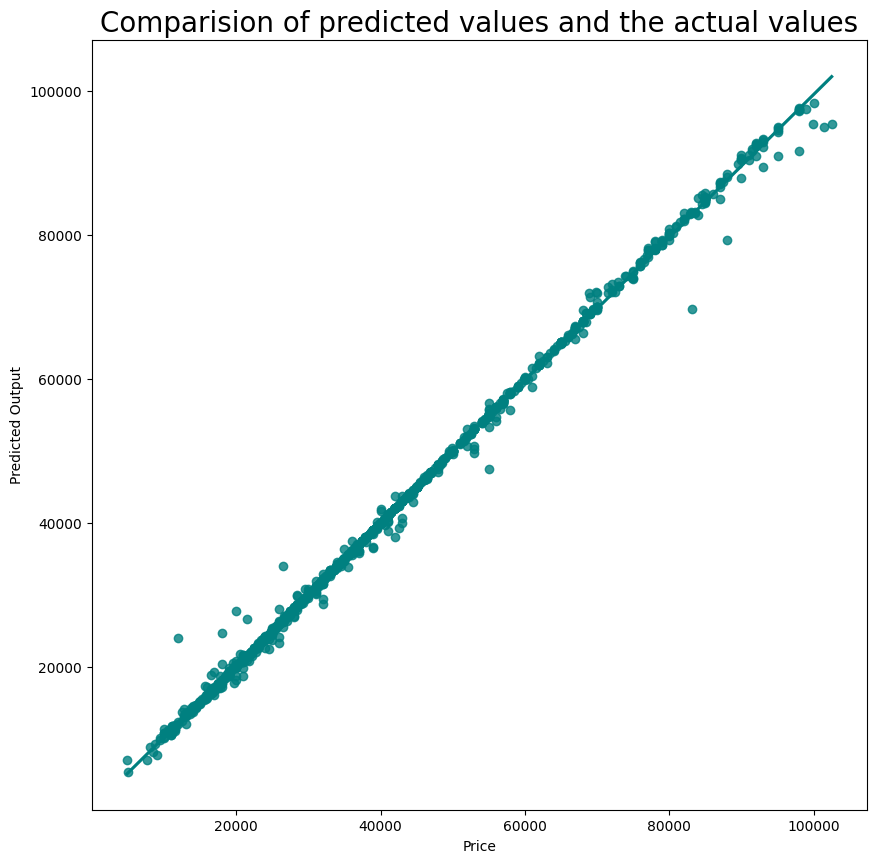

In [29]:
import seaborn as sns

y_predict = pd.DataFrame(predictions, columns = ['Predicted Output'])

results = pd.concat([y_predict, y_test.reset_index(drop = True)], axis = 1, ignore_index = False)

plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'Price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()